IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

INSERTING DATASET

In [2]:
data= pd.read_csv('/content/IRIS.csv')
#reading the data
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#getting shape of dataset
data.shape

(150, 5)

In [4]:
#getting information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#description of datset
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
#duplication check
print('Number of duplication is', data.duplicated().sum(),'.')

Number of duplication is 3 .


In [8]:
#getting column names
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
#scruntinizing
print('rows-->',data.shape[0])
print('columns-->',data.shape[1])

rows--> 150
columns--> 5


MISSING VALUES CHECk

In [10]:
val=data.isnull().sum().sort_values(ascending=False)
val.head()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
#percentage of missing values
val_per = data.isnull().sum()/data.isnull().count()*100
null = pd.DataFrame({'missing values' :val, 'Percentage':val_per.sort_values(ascending=False)})
null.head()

,missing values,Percentage
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


MATRIX PLOT

Text(0.5, 1.0, 'plot to see msiing values')

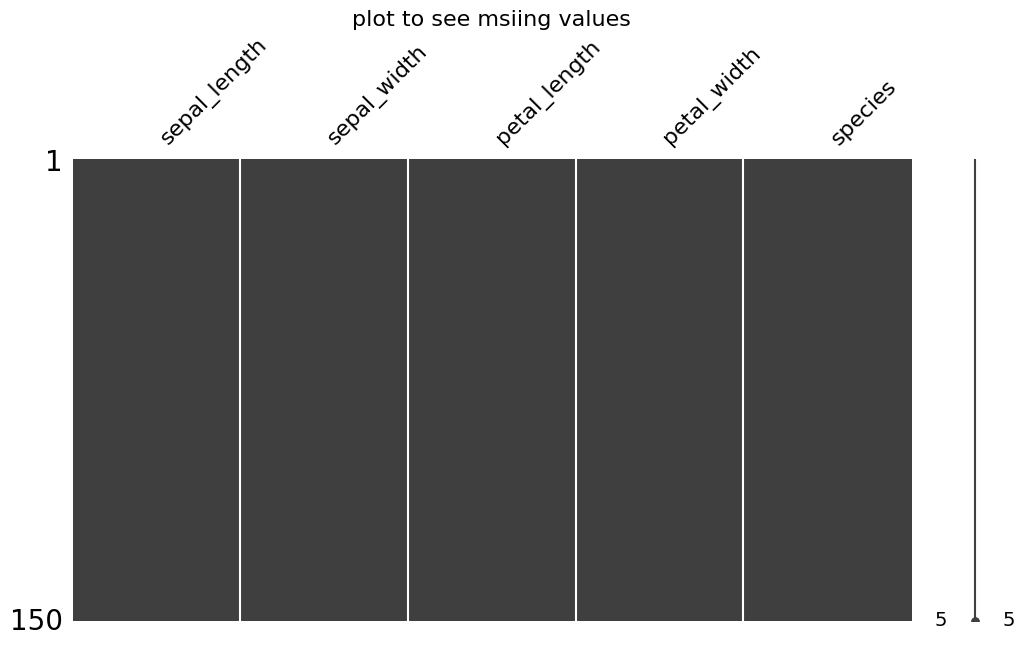

In [12]:
ms.matrix(data, figsize=(12,6))
plt.title("plot to see msiing values",size=16)

BARPLOT

Text(0.5, 1.0, 'Barplot to see lacking of data values')

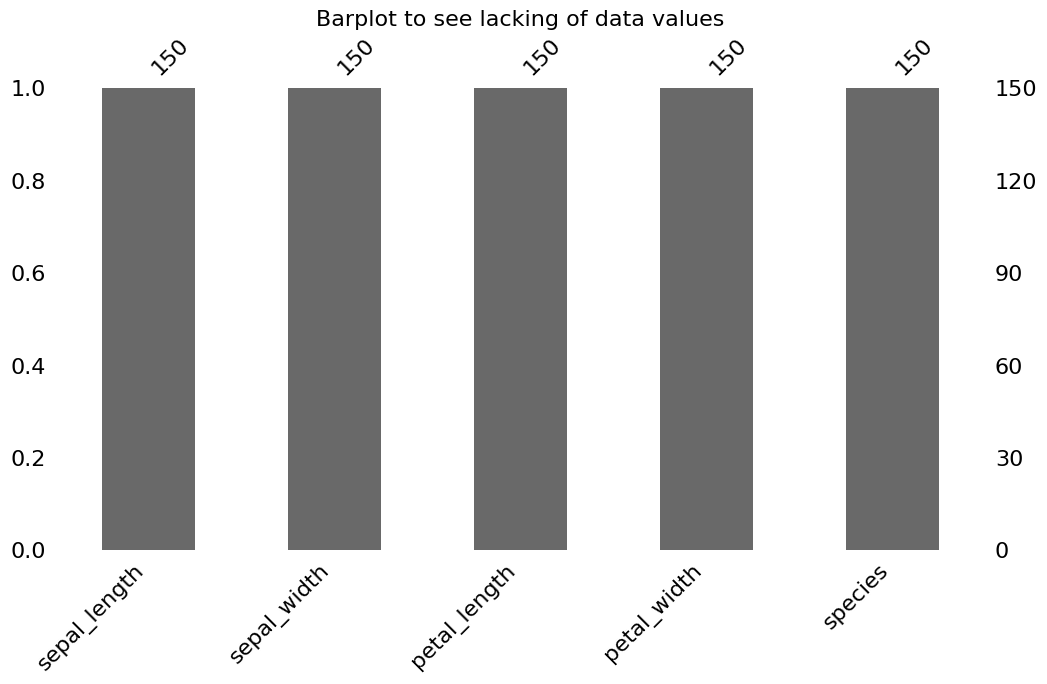

In [13]:
ms.bar(data, figsize=(12,6))
plt.title("Barplot to see lacking of data values", size=16)

VISUAL ANALYSIS

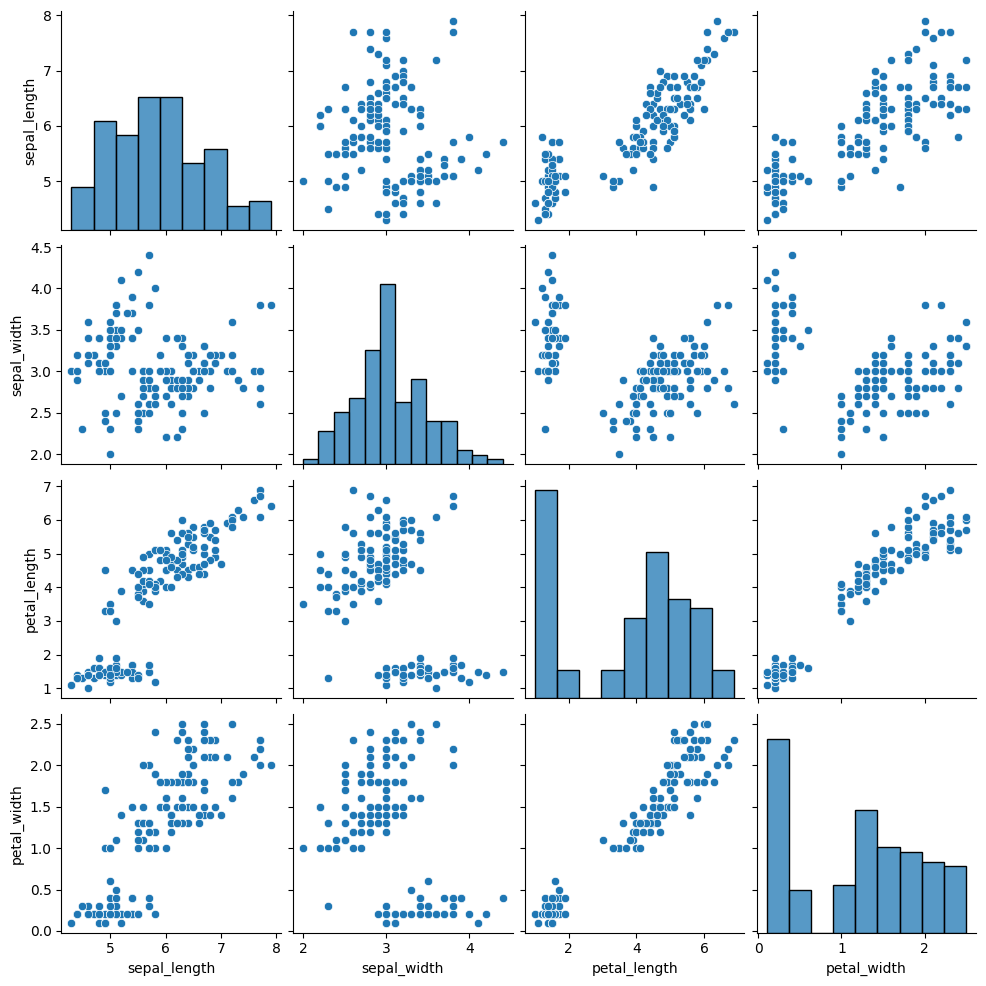

In [14]:
sns.pairplot(data=data)
plt.show()

<Figure size 1200x600 with 0 Axes>

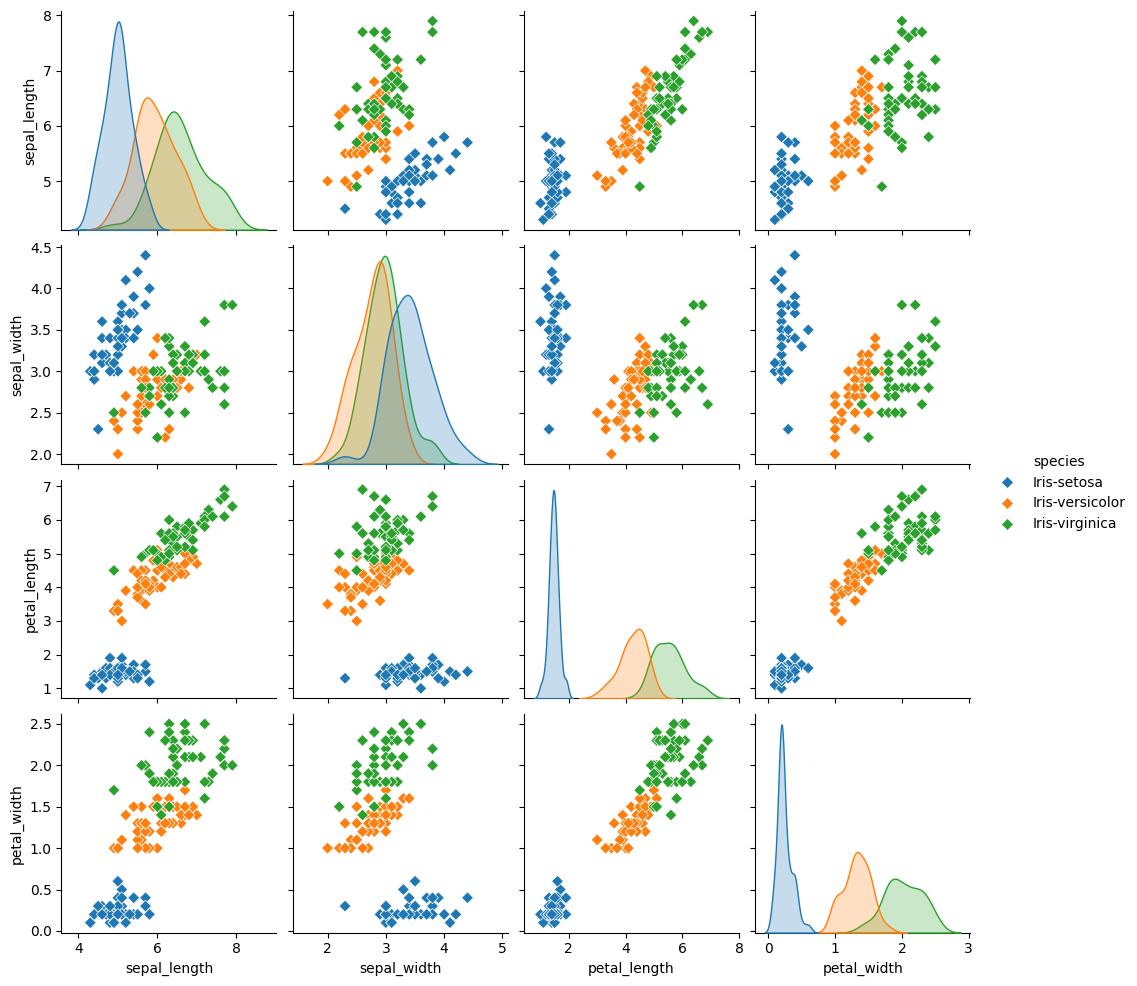

In [15]:
plt.figure(figsize=(12,6))
sns.pairplot(data, hue='species',markers='D')
plt.show()

SPLITTING VALUES

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['EncodedSpecies'] = le.fit_transform(data['species'])
data.drop('species',axis=1, inplace=True)

In [17]:
X=data.iloc[:,0:4]

In [18]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
Y=data.iloc[:,-1]

In [20]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: EncodedSpecies, Length: 150, dtype: int64

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

model= LogisticRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [22]:
if not isinstance(le, LabelEncoder):
  le=labelEncoder()
  le.fit(Y_pred)
  Y_pred_decoded = le.inverse_transform(Y_pred)
  Y_pred_data=pd.DataFrame({'Predicted_Letter':Y_pred_decoded})
  print("printed dataframe")
  print(Y_pred_data)

In [23]:
modelscore=model.score(X_test,Y_test)
print("Model score:",modelscore*100)

Model score: 100.0


In [24]:
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 100.0


In [25]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

